# **SSCS - Training**

Developed by André Paiva

Based on SSCS Dataset created by Helena Cuesta and Emilia Gómez

## 1 - Initialization

In [ ]:
import numpy as np
import tensorflow as tf
import sscs
import matplotlib.pyplot as plt

## 2 - Download and extract dataset SSCS

In [2]:
sscs.download()

SSCS Dataset found.
SSCS Dataset already extracted.
Done.


## 3 - Training VoasCNN

In [ ]:
ds_train = sscs.get_dataset(split='train', end_index=1000)
ds_val = sscs.get_dataset(split='validate', end_index=300)
ds_test = sscs.get_dataset(split='test', end_index=300)

In [4]:
ckpt_dir = './Checkpoints/mask_voas_treino2_tracked.keras'
mask_voas_cnn = sscs.mask_voas_cnn_model()

#print(mask_voas_cnn.summary())

sscs.load_weights(mask_voas_cnn, ckpt_dir=ckpt_dir)
#sscs.train(mask_voas_cnn, ds_train, ds_val, epochs=30, save_model=False, ckpt_dir=ckpt_dir)  

In [5]:
ckpt_dir = './Checkpoints/downsample_voas_cnn.keras'
downsample_voas_cnn = sscs.downsample_voas_cnn_model()

#print(mask_voas_cnn.summary())

#sscs.load_weights(downsample_voas_cnn)
#sscs.train(downsample_voas_cnn, ds_train, ds_val, epochs=30, save_model=False, ckpt_dir=ckpt_dir)  

## 4 - Evaluation with F-Score

In [6]:
songs = sscs.pick_songlist(amount=300, split='test')

def multivoice_f_score(song):
    mix, s, a, t, b = sscs.read_all_voice_splits(song)
    s_pred, a_pred, t_pred, b_pred = mask_voas_cnn.predict(mix)

    mix = np.moveaxis(mix, 0, 1).reshape(360, -1)
    s = np.moveaxis(s, 0, 1).reshape(360, -1)
    a = np.moveaxis(a, 0, 1).reshape(360, -1)
    t = np.moveaxis(t, 0, 1).reshape(360, -1)
    b = np.moveaxis(b, 0, 1).reshape(360, -1)

    s_pred_postproc = sscs.prediction_postproc(s_pred).astype(np.float32)
    a_pred_postproc = sscs.prediction_postproc(a_pred).astype(np.float32)
    t_pred_postproc = sscs.prediction_postproc(t_pred).astype(np.float32)
    b_pred_postproc = sscs.prediction_postproc(b_pred).astype(np.float32)
    mix_pred_postproc = s_pred_postproc + a_pred_postproc + t_pred_postproc + b_pred_postproc
    mix_pred_postproc = sscs.vectorized_downsample_limit(mix_pred_postproc)

    s_fscore = sscs.f_score(s, s_pred_postproc)
    a_fscore = sscs.f_score(a, a_pred_postproc)
    t_fscore = sscs.f_score(t, t_pred_postproc)
    b_fscore = sscs.f_score(b, b_pred_postproc)

    return [s_fscore, a_fscore, t_fscore, b_fscore]

#f_scores = np.array(list(map(multivoice_f_score, songs)))
#np.save('./Evaluation_Data/f-scores.npy', f_scores.T)

In [7]:
f_scores = np.load('./Evaluation_Data/f-scores_treino1.npy')

In [8]:
f_scores.shape

(4, 300)

In [9]:
s_counts, s_bins = np.histogram(f_scores[0], bins=100)
a_counts, a_bins = np.histogram(f_scores[1], bins=100)
t_counts, t_bins = np.histogram(f_scores[2], bins=100)
b_counts, b_bins = np.histogram(f_scores[3], bins=100)

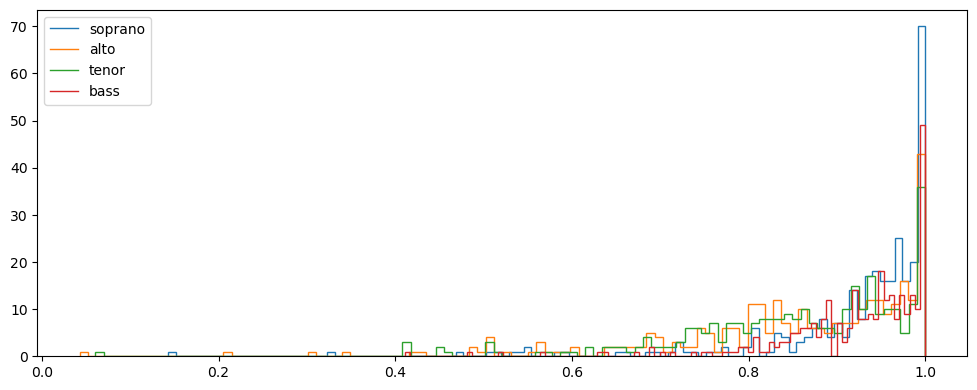

In [10]:
plt.figure(figsize=(12,4.5))
plt.stairs(s_counts, s_bins, label='soprano')
plt.stairs(a_counts, a_bins, label='alto')
plt.stairs(t_counts, t_bins, label='tenor')
plt.stairs(b_counts, b_bins, label='bass')
plt.legend()
plt.show()

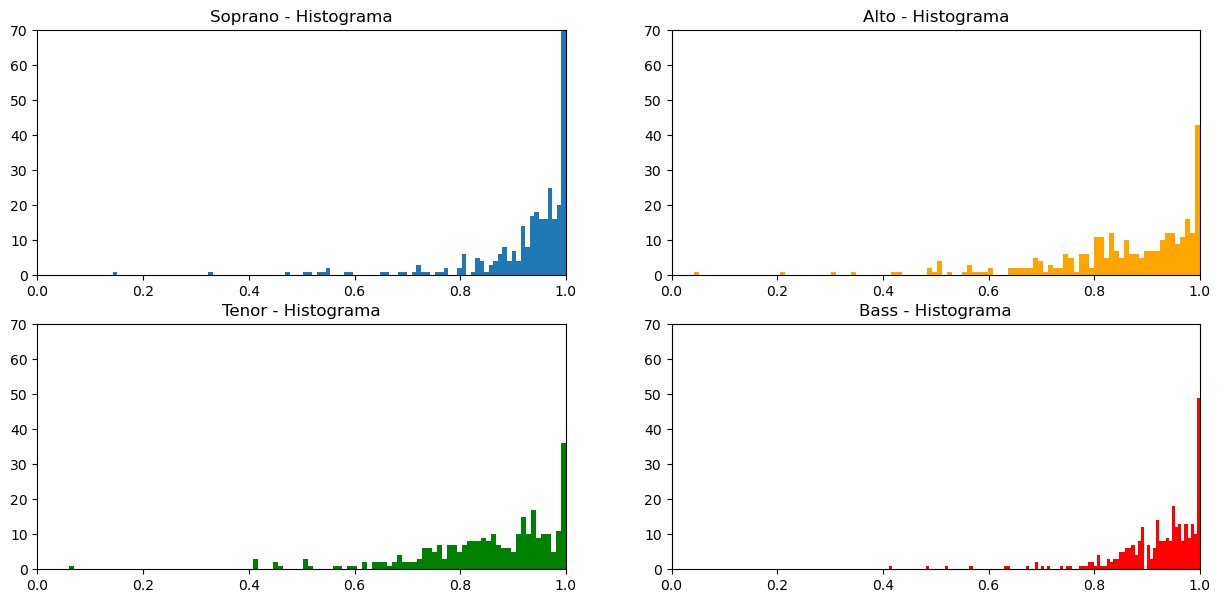

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
axs[0][0].stairs(s_counts, s_bins, fill=True)
axs[0][0].set_title("Soprano - Histograma")
axs[0][0].set_xlim([0, 1])
axs[0][0].set_ylim([0, 70])

axs[0][1].stairs(a_counts, a_bins, fill=True, color='orange')
axs[0][1].set_title("Alto - Histograma")
axs[0][1].set_xlim([0, 1])
axs[0][1].set_ylim([0, 70])

axs[1][0].stairs(t_counts, t_bins, fill=True, color='green')
axs[1][0].set_title("Tenor - Histograma")
axs[1][0].set_xlim([0, 1])
axs[1][0].set_ylim([0, 70])

axs[1][1].stairs(b_counts, b_bins, fill=True, color='red')
axs[1][1].set_title("Bass - Histograma")
axs[1][1].set_xlim([0, 1])
axs[1][1].set_ylim([0, 70])

plt.show()

In [12]:
def boxplot(f_score_array):    
    fig, axs = plt.subplots(1, 4, figsize=(13, 5))
    axs[0].boxplot(f_score_array[0])
    axs[1].boxplot(f_score_array[1])
    axs[2].boxplot(f_score_array[2])
    axs[3].boxplot(f_score_array[3])

    for ax in axs:
        ax.set_ylim([0, 1])

    plt.show()

In [13]:
f_scr1 = np.load("./Evaluation_Data/f-scores_treino1.npy")
f_scr2 = np.load("./Evaluation_Data/f-scores_treino2_tracked.npy")

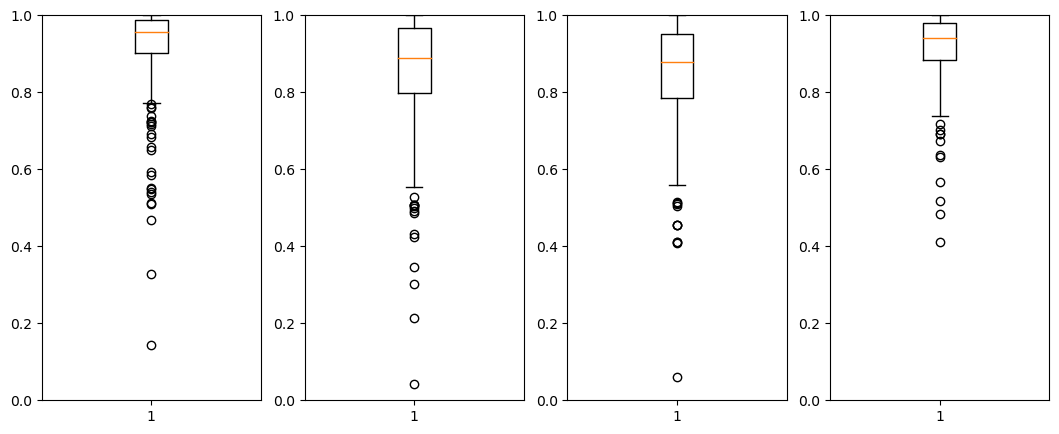

In [14]:
boxplot(f_scr1)

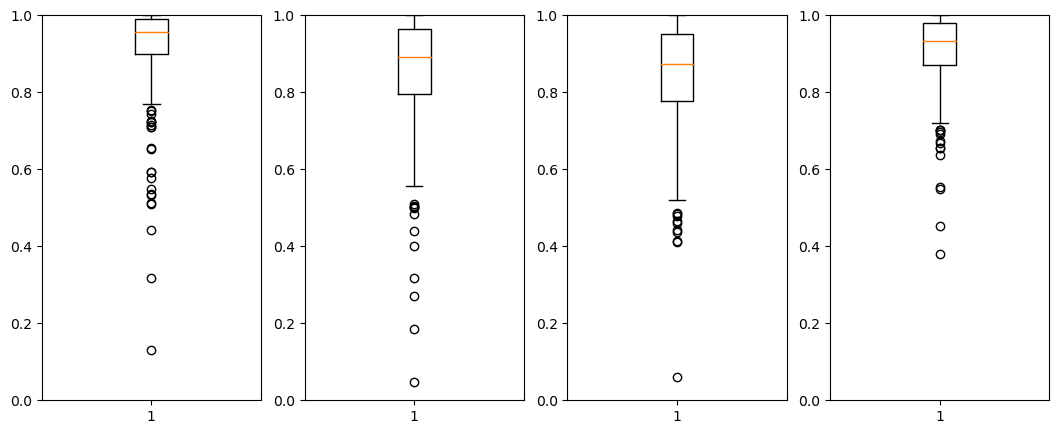

In [15]:
boxplot(f_scr2)

## 5 - Playground

(pid=77758) 2023-06-28 06:30:22.076153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7630] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=77758) 2023-06-28 06:30:22.076195: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=77758) 2023-06-28 06:30:22.076204: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1500] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=77758) 2023-06-28 06:30:22.082581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(pid=77758) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compil

3/3 [==============================] - 8s 178ms/step
F-Scores:
Soprano: 0.9309260170731734
Alto: 0.8570883646341493
Tenor: 0.8257907274390275
Bass: 0.8582316573170762



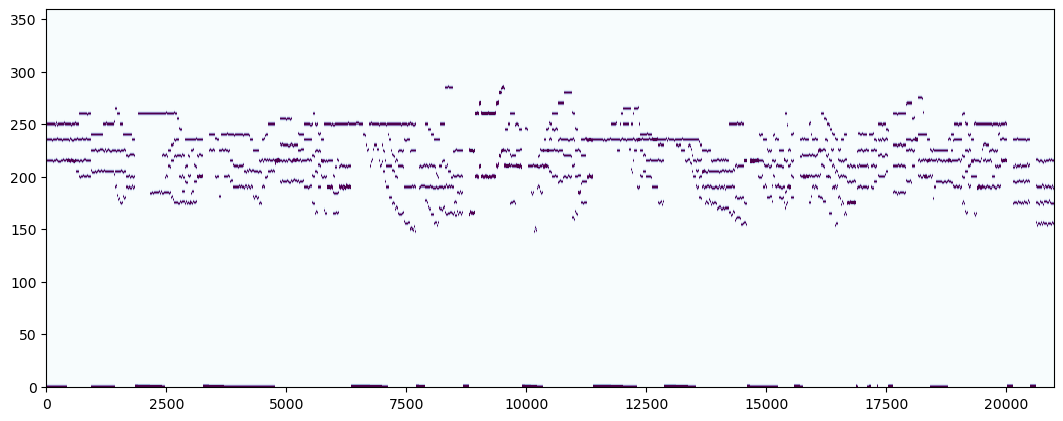

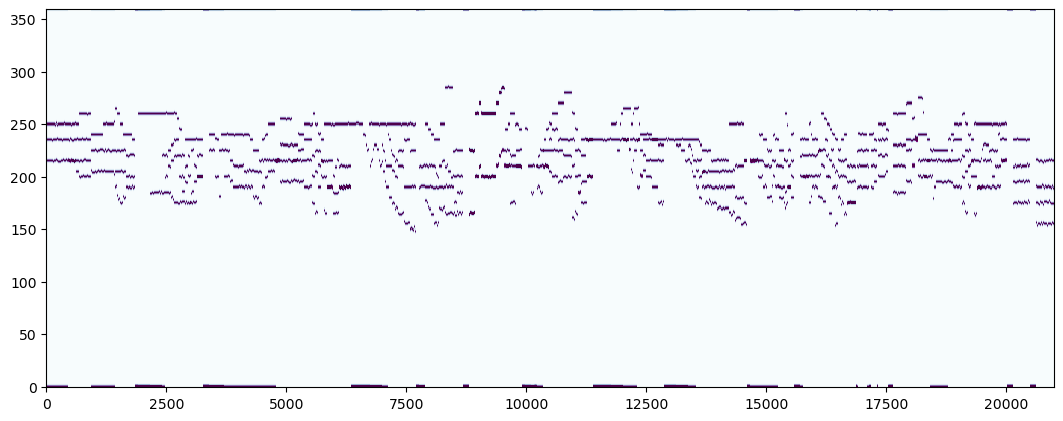

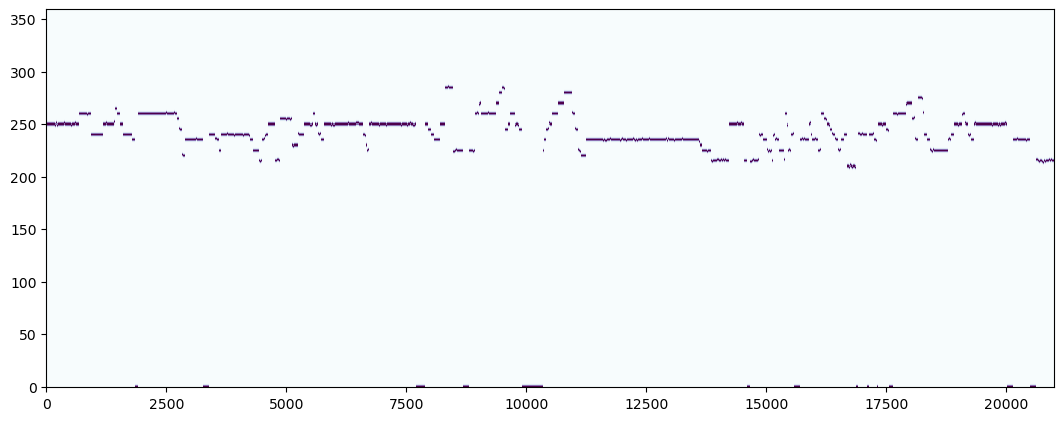

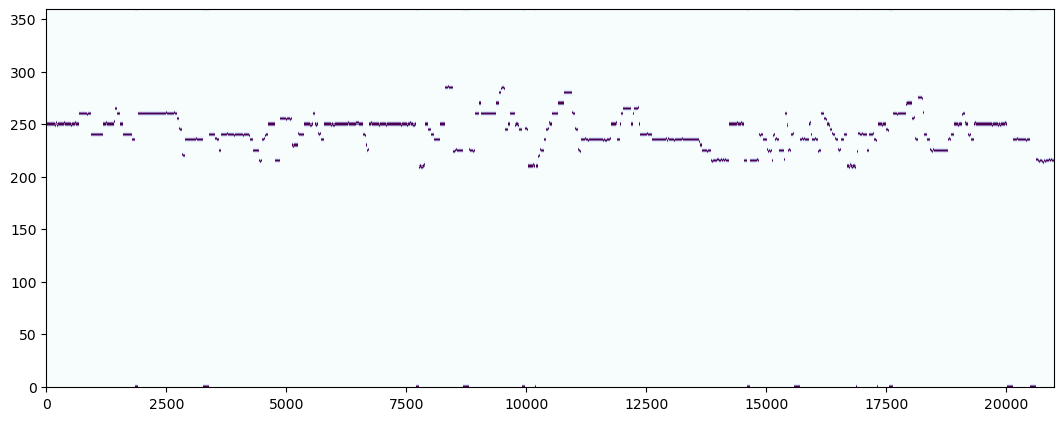

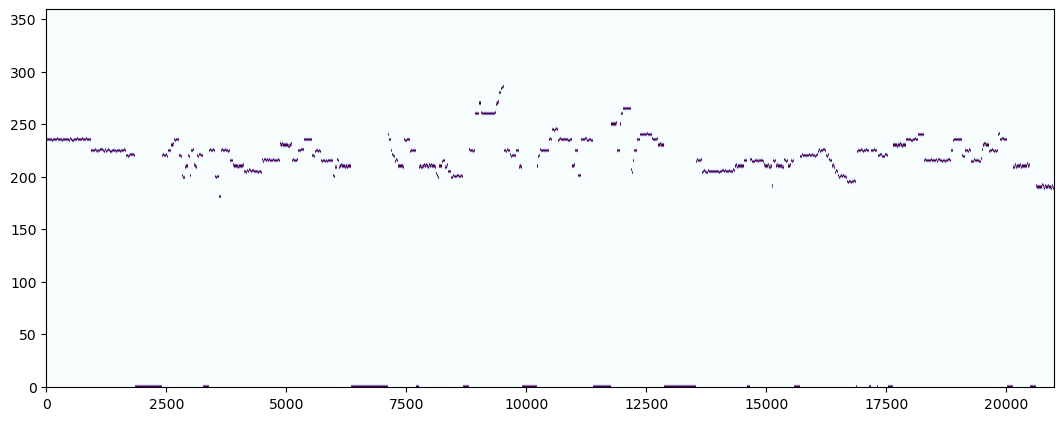

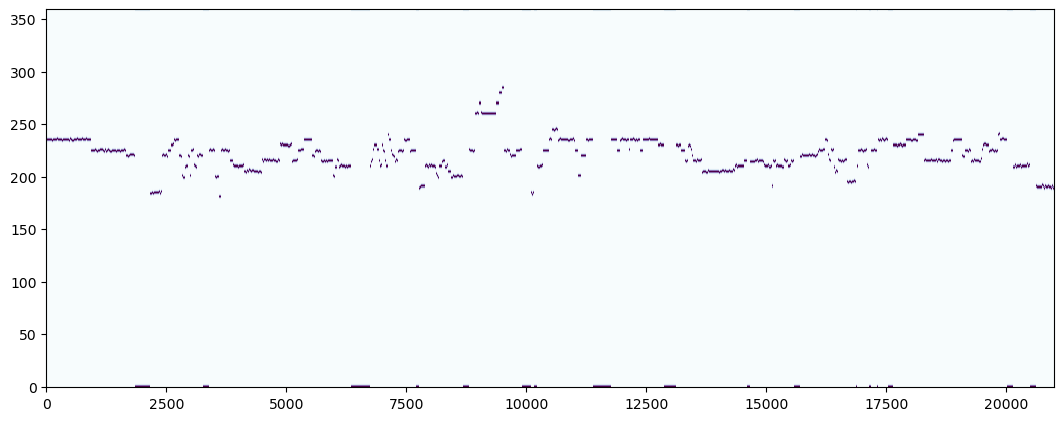

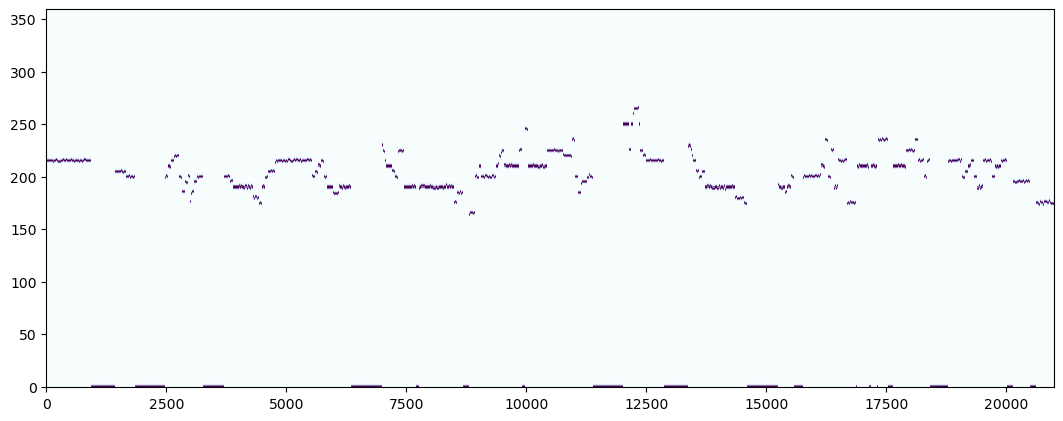

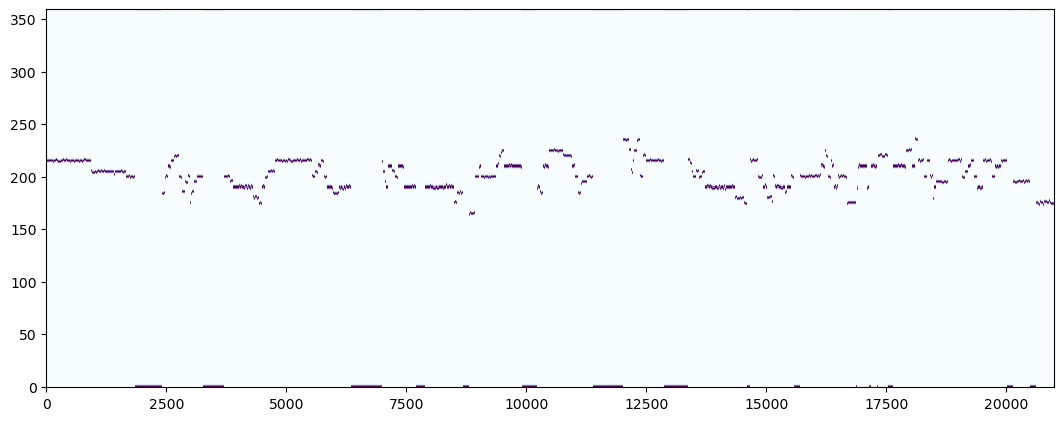

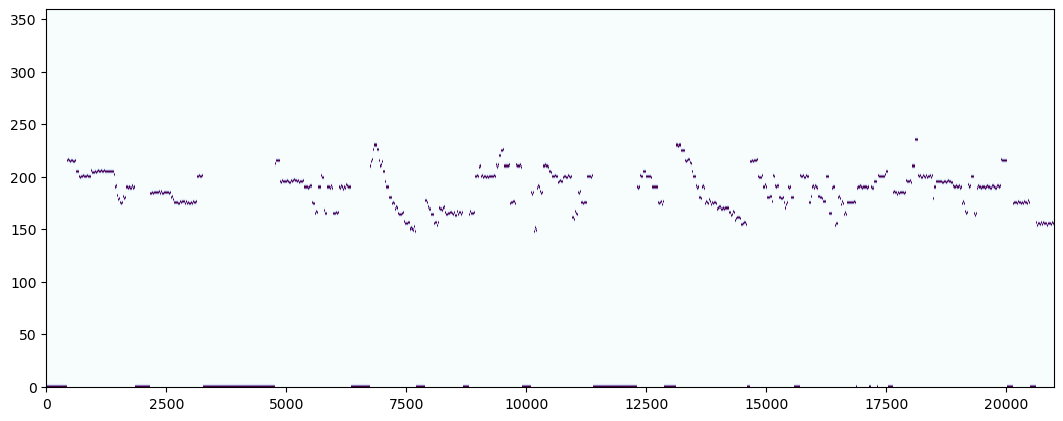

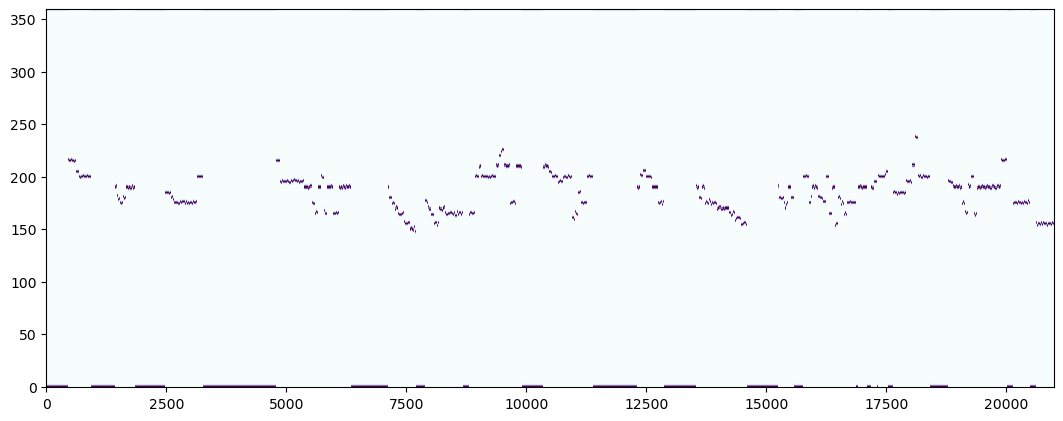

In [16]:
rand_song = sscs.pick_random_song(split='test')
mix, s, a, t, b = sscs.read_all_voice_splits(rand_song)

s_pred, a_pred, t_pred, b_pred = mask_voas_cnn.predict(mix)

mix = np.moveaxis(mix, 0, 1).reshape(360, -1)
s = np.moveaxis(s, 0, 1).reshape(360, -1)
a = np.moveaxis(a, 0, 1).reshape(360, -1)
t = np.moveaxis(t, 0, 1).reshape(360, -1)
b = np.moveaxis(b, 0, 1).reshape(360, -1)

s_pred_postproc = sscs.prediction_postproc(s_pred).astype(np.float32)
a_pred_postproc = sscs.prediction_postproc(a_pred).astype(np.float32)
t_pred_postproc = sscs.prediction_postproc(t_pred).astype(np.float32)
b_pred_postproc = sscs.prediction_postproc(b_pred).astype(np.float32)
mix_pred_postproc = s_pred_postproc + a_pred_postproc + t_pred_postproc + b_pred_postproc
mix_pred_postproc = sscs.vectorized_downsample_limit(mix_pred_postproc)

s_fscore = sscs.f_score(s, s_pred_postproc)
a_fscore = sscs.f_score(a, a_pred_postproc)
t_fscore = sscs.f_score(t, t_pred_postproc)
b_fscore = sscs.f_score(b, b_pred_postproc)

print("F-Scores:")
print(f"Soprano: {s_fscore}")
print(f"Alto: {a_fscore}")
print(f"Tenor: {t_fscore}")
print(f"Bass: {b_fscore}")
print()

sscs.plot(mix)
sscs.plot(mix_pred_postproc)

sscs.plot(s)
sscs.plot(s_pred_postproc)

sscs.plot(a)
sscs.plot(a_pred_postproc)

sscs.plot(t)
sscs.plot(t_pred_postproc)

sscs.plot(b)
sscs.plot(b_pred_postproc)

sscs.song_to_midi(s, a, t, b, './MIDI/original.mid')
sscs.song_to_midi(s_pred_postproc, a_pred_postproc, t_pred_postproc, b_pred_postproc,
                  './MIDI/predicted.mid')